In [97]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Iot_WaterQuality.csv")

# Sort the dataframe based on the date column
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df = df.sort_values('date')
print(df.head())

# Remove duplicate rows
df = df.drop_duplicates()

# Check for missing values
print(df.isnull().sum())

# Fill in missing values with mean imputation
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Check for outliers
z_scores = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Check for data consistency
print(df.describe())

# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_Iot_WaterQuality.csv", index=False)


        id       date  NH4  BSK5  Suspended    O2  NO3   NO2   SO4   PO4    CL
1131  12.0 2000-01-10  1.5   1.5        9.0  15.2  7.4  0.32  37.6  0.06  36.7
1945  16.0 2000-01-10  1.2   2.6        8.0  16.5  6.7  0.30  34.3  0.02  29.5
1428  14.0 2000-01-10  1.3   1.9        9.0  15.8  6.3  0.30  40.1  1.61  31.3
1687  15.0 2000-01-10  1.1   2.1       22.0  16.1  7.0  0.28  31.9  0.01  28.6
820   10.0 2000-01-11  2.5   2.6        7.0   8.7  7.7  0.15  40.9  0.04  34.0
id           173
date           0
NH4            3
BSK5           1
Suspended     16
O2             3
NO3            1
NO2            3
SO4           49
PO4           28
CL            49
dtype: int64
                id          NH4         BSK5    Suspended           O2  \
count  2689.000000  2689.000000  2689.000000  2689.000000  2689.000000   
mean     11.850045     0.464225     4.114651    11.260951     9.387786   
std       5.354577     0.788260     2.449831     8.443445     3.277440   
min       1.000000     0.00000

In [74]:
import pandas as pd
df = pd.read_csv('cleaned_Iot_WaterQuality.csv')
print(df)


      id       date   NH4  BSK5  Suspended    O2   NO3    NO2    SO4    PO4  \
0      1  1/10/2000  1.50   1.5        9.0  15.2  7.40  0.320  37.60  0.060   
1      1  1/10/2000  1.20   2.6        8.0  16.5  6.70  0.300  34.30  0.020   
2      1  1/10/2000  1.30   1.9        9.0  15.8  6.30  0.300  40.10  1.610   
3      1  1/10/2000  1.10   2.1       22.0  16.1  7.00  0.280  31.90  0.010   
4      1  1/11/2000  2.50   2.6        7.0   8.7  7.70  0.150  40.90  0.040   
...   ..        ...   ...   ...        ...   ...   ...    ...    ...    ...   
2684  22  3/17/2021  0.60   3.8        6.0  10.8  4.20  0.080  32.20  0.350   
2685  22   4/6/2021  0.43   5.6        8.0  12.3  6.57  0.129  60.15  0.052   
2686  22   4/6/2021  0.16   6.1        9.0  10.8  6.38  0.164  45.50  0.045   
2687  22   4/6/2021  0.17   6.2        8.0  13.9  8.07  0.179  57.17  0.040   
2688  22   4/7/2021  0.16   4.8        6.0  15.7  4.79  0.117  36.69  0.035   

        CL  
0     36.7  
1     29.5  
2     31.3  

In [75]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,1/10/2000,1.5,1.5,9.0,15.2,7.4,0.32,37.6,0.06,36.7
1,1,1/10/2000,1.2,2.6,8.0,16.5,6.7,0.30,34.3,0.02,29.5
2,1,1/10/2000,1.3,1.9,9.0,15.8,6.3,0.30,40.1,1.61,31.3
3,1,1/10/2000,1.1,2.1,22.0,16.1,7.0,0.28,31.9,0.01,28.6
4,1,1/11/2000,2.5,2.6,7.0,8.7,7.7,0.15,40.9,0.04,34.0


In [76]:
df.drop_duplicates(inplace=True)
df.describe()

,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000
mean,11.784970,0.464011,4.114842,11.257179,9.387447,3.711028,0.158678,49.472589,0.344559,40.793491
std,5.753972,0.788328,2.450267,8.442750,3.278002,3.254954,0.472708,34.012702,0.320309,59.304882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.000000,8.500000
25%,7.000000,0.080000,2.100000,6.000000,7.100000,1.300000,0.030000,26.900000,0.120750,26.500000
50%,13.000000,0.220000,3.705000,10.000000,8.995000,2.730000,0.056000,37.420000,0.270000,33.340000
75%,16.000000,0.480000,5.600000,14.000000,11.500000,5.352500,0.120000,61.000000,0.454000,44.507500
max,22.000000,8.050000,13.020000,59.500000,22.040000,23.700000,6.790000,324.500000,2.640000,1264.000000


In [77]:
df.dtypes


id             int64
date          object
NH4          float64
BSK5         float64
Suspended    float64
O2           float64
NO3          float64
NO2          float64
SO4          float64
PO4          float64
CL           float64
dtype: object

In [78]:
# Check for missing values in each column
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)


id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
dtype: int64


C:\Users\sreeh\AppData\Local\Temp\ipykernel_25664\3778994243.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


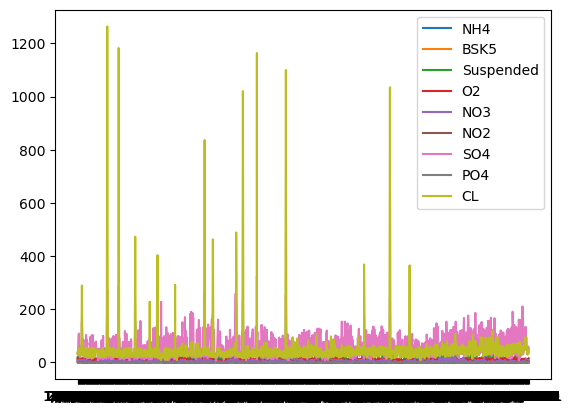

In [79]:
import matplotlib.pyplot as plt

# set date column as the index
df.set_index('date', inplace=True)

# create line plots of date vs. all other columns
for col in df.columns:
    if col != 'id':
        plt.plot(df.index, df[col], label=col)

plt.legend()
plt.show()


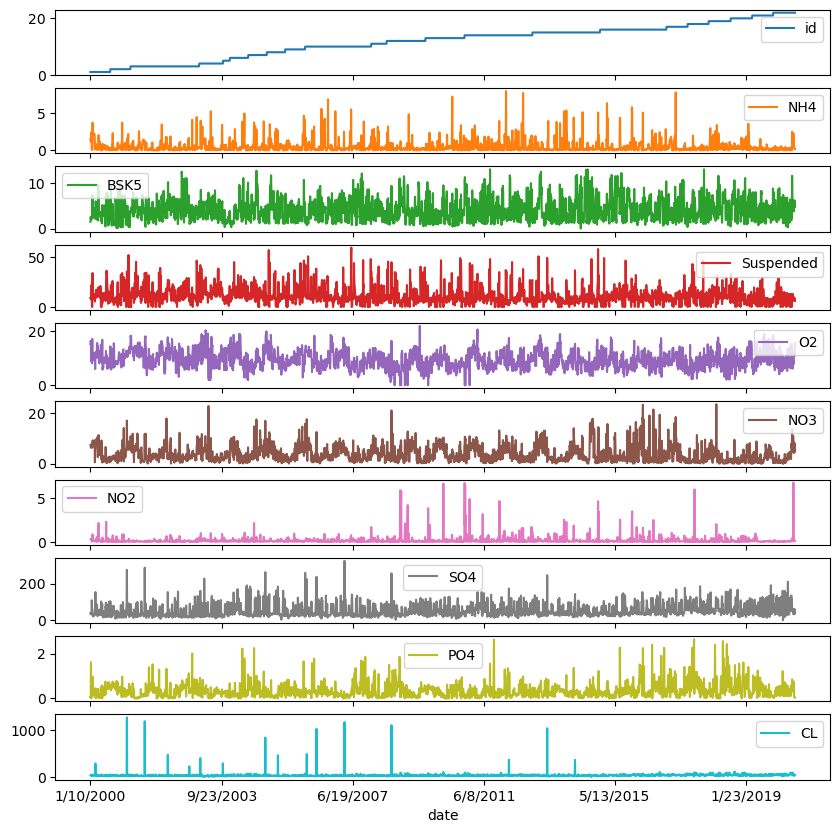

In [80]:
import matplotlib.pyplot as plt

# plot each variable over time
df.plot(subplots=True, figsize=(10, 10))

# display the plots
plt.show()


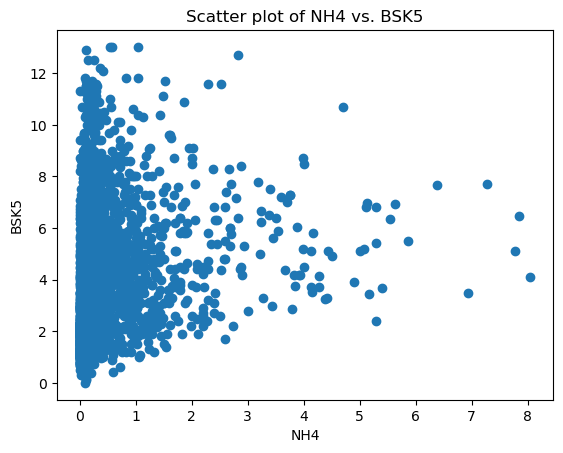

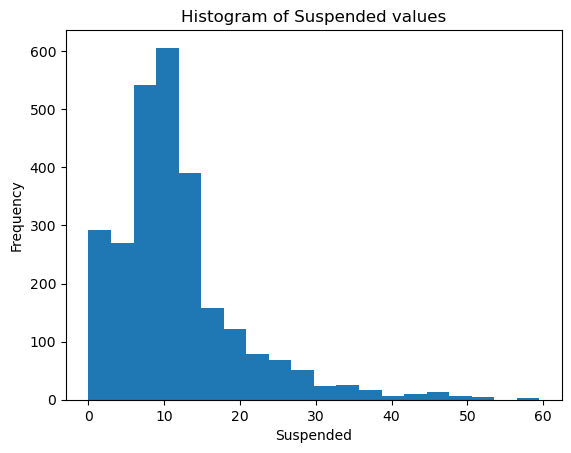

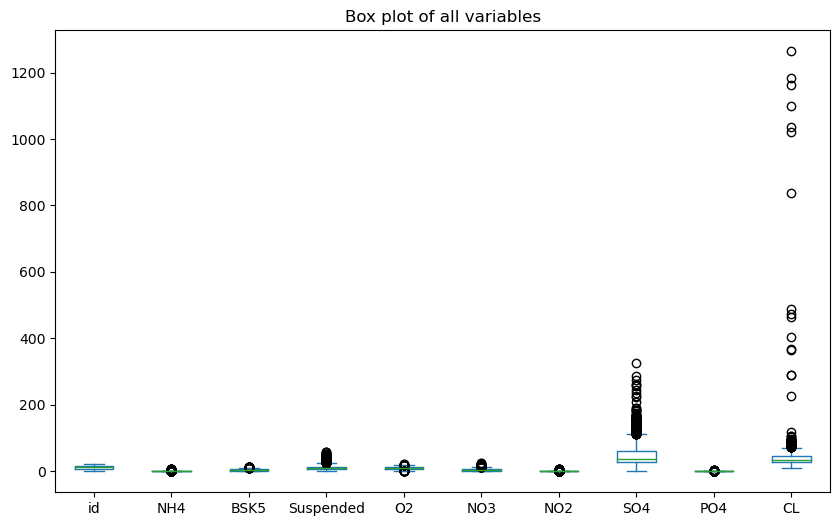

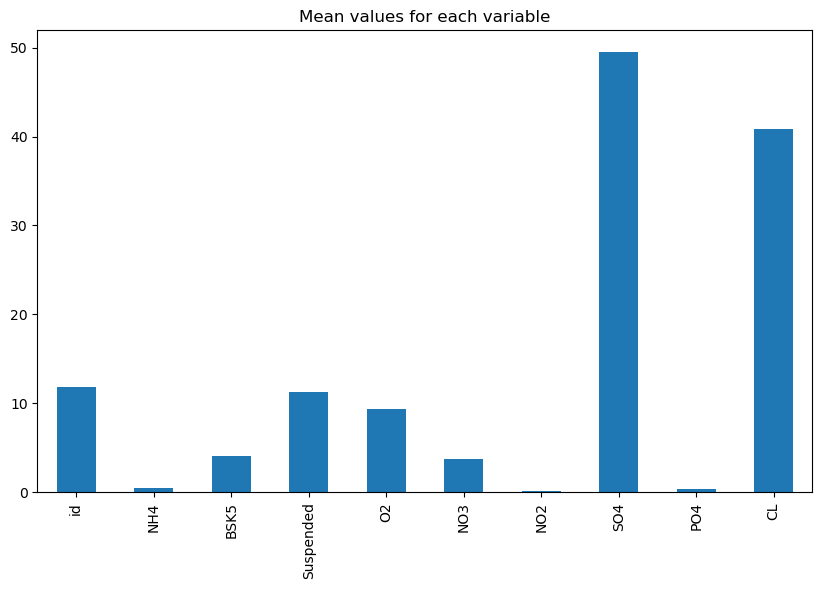

In [81]:
import matplotlib.pyplot as plt

# create scatter plot of NH4 vs. BSK5
plt.scatter(df['NH4'], df['BSK5'])
plt.xlabel('NH4')
plt.ylabel('BSK5')
plt.title('Scatter plot of NH4 vs. BSK5')
plt.show()


# create histogram of Suspended values
plt.hist(df['Suspended'], bins=20)
plt.xlabel('Suspended')
plt.ylabel('Frequency')
plt.title('Histogram of Suspended values')
plt.show()

import matplotlib.pyplot as plt

# create box plot of all variables
df.plot(kind='box', figsize=(10,6))
plt.title('Box plot of all variables')
plt.show()

import matplotlib.pyplot as plt

# create bar plot of mean values for each variable
df.mean().plot(kind='bar', figsize=(10,6))
plt.title('Mean values for each variable')
plt.show()



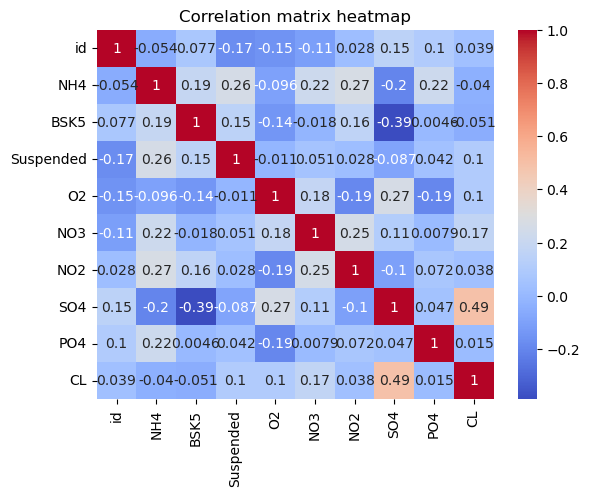

In [82]:

import matplotlib.pyplot as plt
import seaborn as sns

# create correlation matrix and heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation matrix heatmap')
plt.show()

# Linear Regression


In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('cleaned_Iot_WaterQuality.csv')

# Split the dataset into features and target variables
X = df[['date', 'O2']]
y = df[['NH4', 'BSK5', 'Suspended', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']]

# Convert date to numerical values
X.loc[:, 'date'] = pd.to_datetime(X['date'])
X.loc[:, 'date'] = X['date'].apply(lambda x: x.toordinal())

# Fit the linear regression model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# Make predictions
new_X = np.array([[737100, 10.2], [737200, 8.7]]) # Dates converted to numerical values
predictions = model.predict(new_X)

print(predictions)

[[ 0.44846513  4.05286097 11.28963809  3.86601536  0.13809481 51.82011455
   0.33153242 42.40295789]
 [ 0.48288647  4.2100647  11.32341467  3.59497548  0.17948245 47.70522193
   0.35999355 39.63303538]]


C:\Users\sreeh\AppData\Local\Temp\ipykernel_25664\747833201.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'date'] = pd.to_datetime(X['date'])
C:\Users\sreeh\AppData\Local\Temp\ipykernel_25664\747833201.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'date'] = X['date'].apply(lambda x: x.toordinal())
C:\Users\sreeh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(

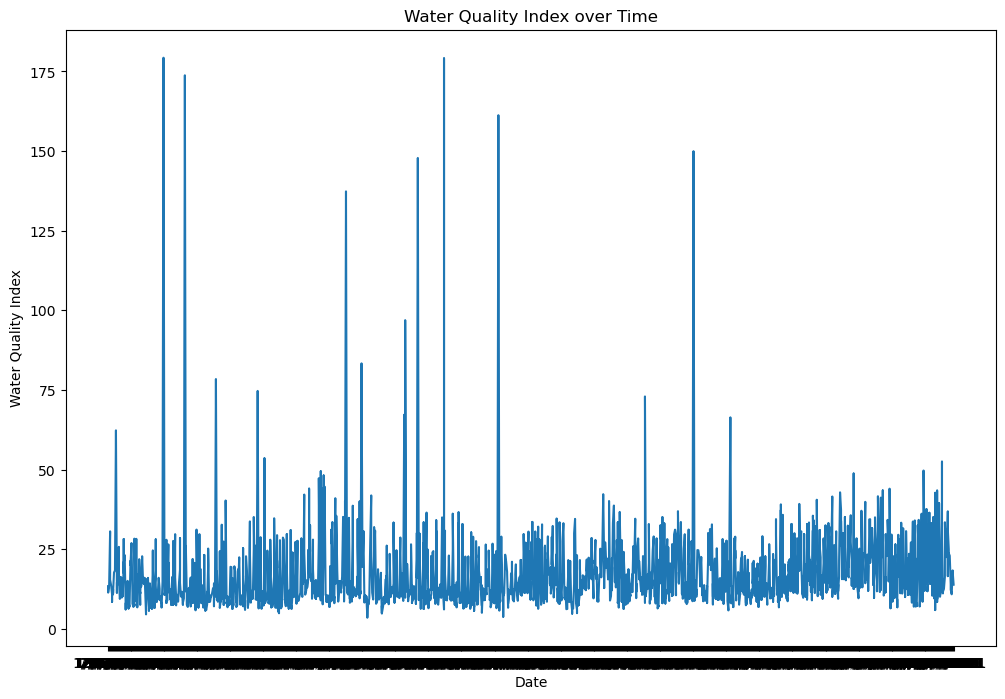

In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('cleaned_Iot_WaterQuality.csv')

# Calculate the water quality index
df['WQI'] = 0.074 * df['NH4'] + 0.057 * df['BSK5'] + 0.021 * df['Suspended'] + 0.146 * df['NO3'] + 0.031 * df['NO2'] + 0.221 * df['SO4'] + 0.204 * df['PO4'] + 0.091 * df['CL']

# Plot the water quality index over time
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(df['date'], df['WQI'])
plt.xlabel('Date')
plt.ylabel('Water Quality Index')
plt.title('Water Quality Index over Time')
plt.show()

# RNN


In [115]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# load data
df = pd.read_csv('cleaned_Iot_WaterQuality.csv', parse_dates=['date'], index_col='date')

# prepare data for RNN
scaler = MinMaxScaler()
data = scaler.fit_transform(df.values)
sequence_length = 30 # length of sequence for each training example
prediction_window = 1 # how many time steps to predict into the future

X = []
y = []
for i in range(len(data) - sequence_length - prediction_window):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length+prediction_window-1, 2:]) # predict all pollutants except for id and date

X = np.array(X)
y = np.array(y)

# split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# define RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

# train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# predict on test data
y_pred = model.predict(X_test)

# calculate MSE
mse = np.mean((y_test - y_pred)**2)
print('MSE:', mse)



Epoch 1/50
67/67 [==============================] - 6s 36ms/step - loss: 0.0207 - val_loss: 0.0164
Epoch 2/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0167 - val_loss: 0.0155
Epoch 3/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0163 - val_loss: 0.0155
Epoch 4/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0158 - val_loss: 0.0160
Epoch 5/50
67/67 [==============================] - 2s 24ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 6/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0154 - val_loss: 0.0153
Epoch 7/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 8/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0151 - val_loss: 0.0148
Epoch 9/50
67/67 [==============================] - 2s 24ms/step - loss: 0.0151 - val_loss: 0.0147
Epoch 10/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0151 - val_loss: 0.0154
Epoch 11/

In [118]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# load data
df = pd.read_csv('cleaned_Iot_WaterQuality.csv', parse_dates=['date'], index_col='date')

# calculate WQI based on different pollutant concentrations
df['WQI'] = 0.0 # initialize WQI column
df['WQI'] += (df['NH4'] / 0.25) * 0.028 # add NH4 contribution
df['WQI'] += (df['BSK5'] / 5.0) * 0.234 # add BSK5 contribution
df['WQI'] += (df['Suspended'] / 50.0) * 0.172 # add Suspended contribution
df['WQI'] += (df['NO3'] / 5.0) * 0.028 # add NO3 contribution
df['WQI'] += (df['NO2'] / 1.0) * 0.078 # add NO2 contribution
df['WQI'] += (df['SO4'] / 50.0) * 0.056 # add SO4 contribution
df['WQI'] += (df['PO4'] / 1.0) * 0.100 # add PO4 contribution

print(df)


            id   NH4  BSK5  Suspended    O2   NO3    NO2    SO4    PO4    CL  \
date                                                                           
2000-01-10   1  1.50   1.5        9.0  15.2  7.40  0.320  37.60  0.060  36.7   
2000-01-10   1  1.20   2.6        8.0  16.5  6.70  0.300  34.30  0.020  29.5   
2000-01-10   1  1.30   1.9        9.0  15.8  6.30  0.300  40.10  1.610  31.3   
2000-01-10   1  1.10   2.1       22.0  16.1  7.00  0.280  31.90  0.010  28.6   
2000-01-11   1  2.50   2.6        7.0   8.7  7.70  0.150  40.90  0.040  34.0   
...         ..   ...   ...        ...   ...   ...    ...    ...    ...   ...   
2021-03-17  22  0.60   3.8        6.0  10.8  4.20  0.080  32.20  0.350  28.9   
2021-04-06  22  0.43   5.6        8.0  12.3  6.57  0.129  60.15  0.052  38.8   
2021-04-06  22  0.16   6.1        9.0  10.8  6.38  0.164  45.50  0.045  37.9   
2021-04-06  22  0.17   6.2        8.0  13.9  8.07  0.179  57.17  0.040  39.7   
2021-04-07  22  0.16   4.8        6.0  1

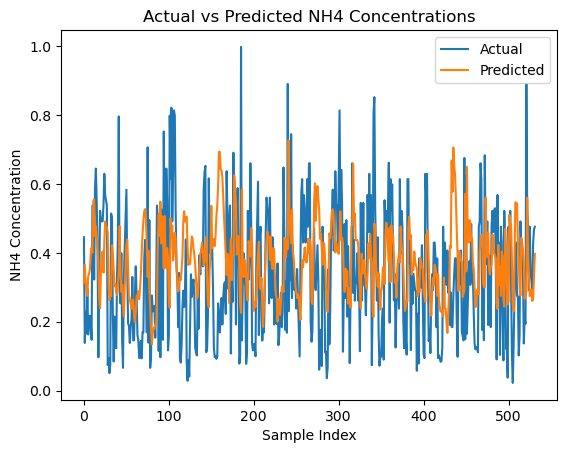

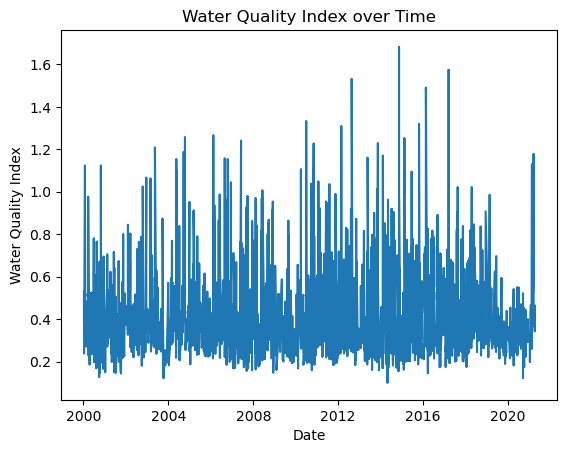

In [119]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot actual vs predicted values for NH4
plt.plot(y_test[:, 0], label='Actual')
plt.plot(y_pred[:, 0], label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('NH4 Concentration')
plt.title('Actual vs Predicted NH4 Concentrations')
plt.legend()
plt.show()

# Plot actual vs predicted values for WQI
import matplotlib.pyplot as plt

# assuming your data is stored in a pandas DataFrame named "df"
plt.plot(df.index, df['WQI'])
plt.xlabel('Date')
plt.ylabel('Water Quality Index')
plt.title('Water Quality Index over Time')
plt.show()



# LSTM


In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load data
data = pd.read_csv('cleaned_Iot_WaterQuality.csv', parse_dates=['date'])

# Select columns for training
train_cols = ['NH4', 'BSK5', 'Suspended', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

# Split data into training and testing sets
train_data = data[data['date'] < '2019-01-01'][train_cols].values
test_data = data[data['date'] >= '2019-01-01'][train_cols].values

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Create input and output sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length)])
        y.append(data[(i+seq_length)])
    return np.array(X), np.array(y)

seq_length = 30 # number of previous time steps to use as input

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data to add batch_size dimension
X_train = X_train.reshape(-1, seq_length, train_data.shape[1])
X_test = X_test.reshape(-1, seq_length, train_data.shape[1])

# Define LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, train_data.shape[1])))
model.add(LSTM(units=50))
model.add(Dense(units=8))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Train MSE:', train_score)
print('Test MSE:', test_score)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse scale data
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Print example predictions
print('Example Predictions:')
print('Train - Actual:', y_train[0], 'Predicted:', train_predict[0])
print('Test - Actual:', y_test[0], 'Predicted:', test_predict[0])


Epoch 1/50
70/70 [==============================] - 4s 21ms/step - loss: 0.0160 - val_loss: 0.0160
Epoch 2/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0140 - val_loss: 0.0148
Epoch 3/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0138 - val_loss: 0.0142
Epoch 4/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0136 - val_loss: 0.0139
Epoch 5/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0135 - val_loss: 0.0140
Epoch 6/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0134 - val_loss: 0.0143
Epoch 7/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0132 - val_loss: 0.0139
Epoch 8/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0131 - val_loss: 0.0135
Epoch 9/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0129 - val_loss: 0.0137
Epoch 10/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0128 - val_loss: 0.0139
Epoch 11/

5/5 [==============================] - 0s 5ms/step


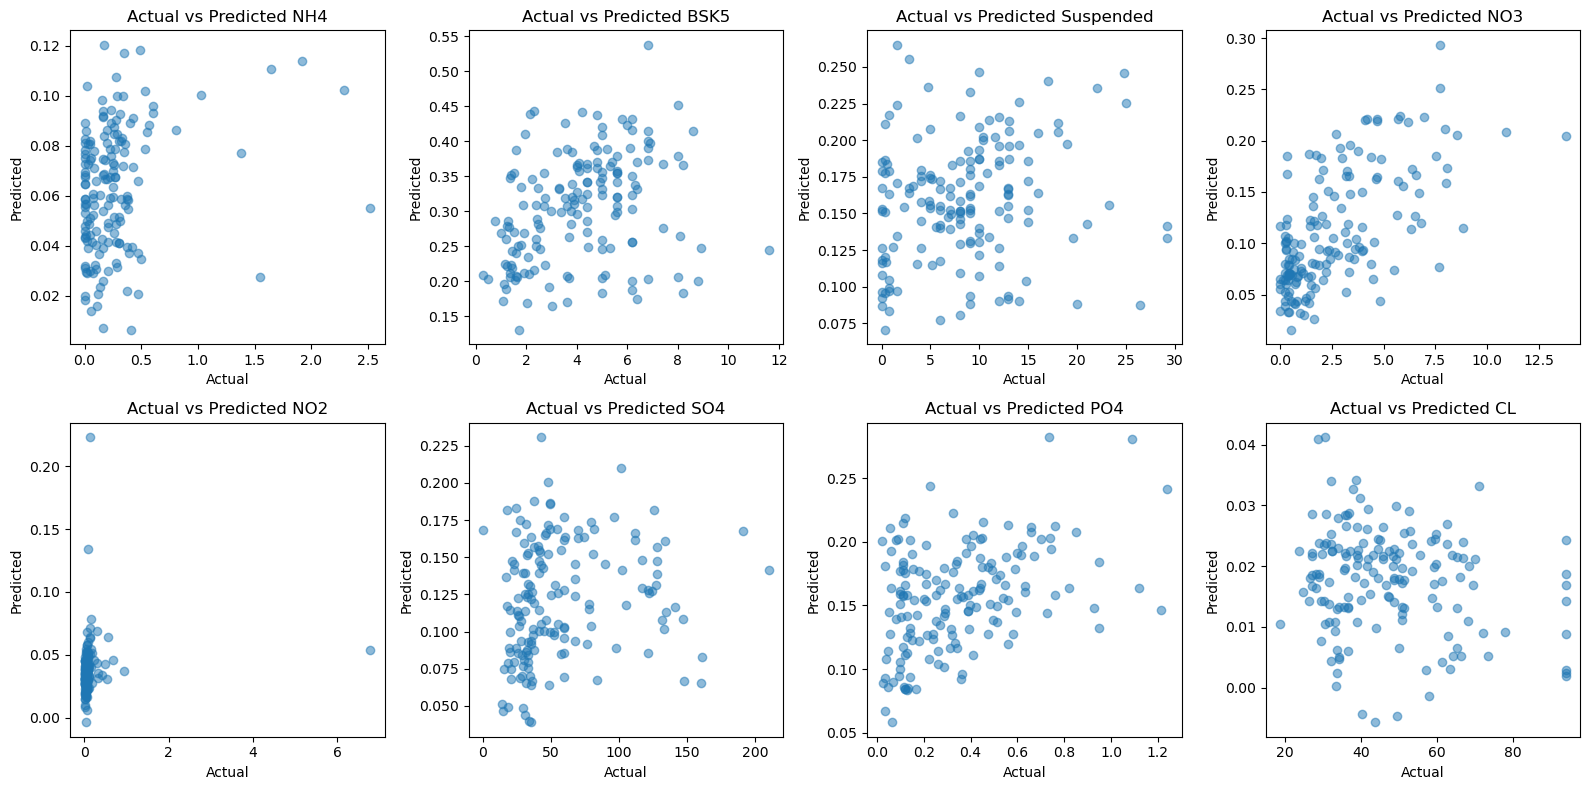

In [99]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i, param in enumerate(params):
    row = i // 4
    col = i % 4
    param_idx = params.index(param)
    axs[row, col].scatter(y_test[:, param_idx],y_pred[:, param_idx], alpha=0.5)
    axs[row, col].set_title(f"Actual vs Predicted {param}")
    axs[row, col].set_xlabel("Actual")
    axs[row, col].set_ylabel("Predicted")
plt.tight_layout()
plt.show()


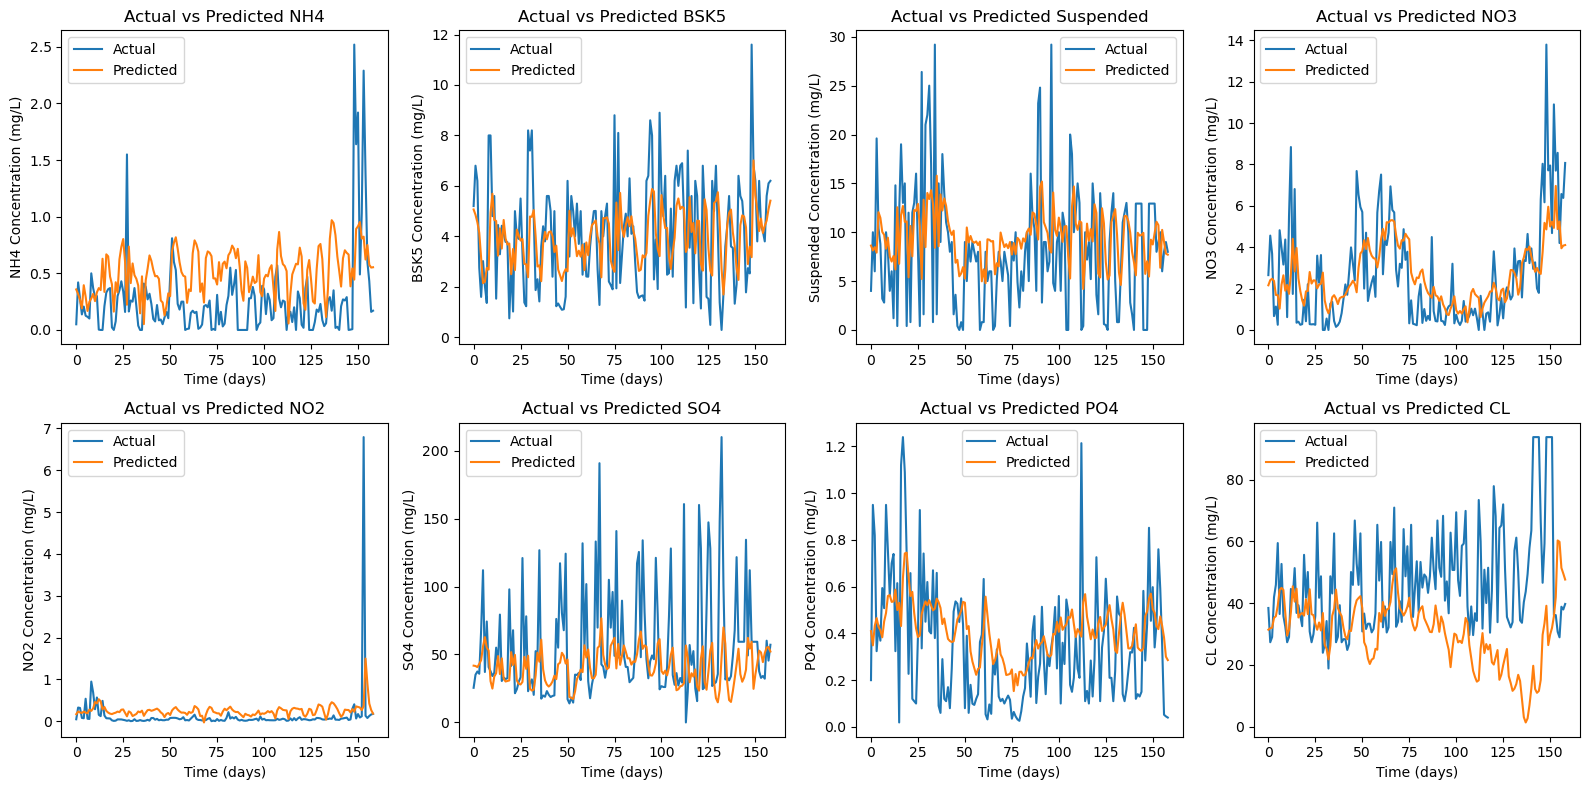

In [109]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
params = ['NH4', 'BSK5', 'Suspended', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

for i, param in enumerate(params):
    row = i // 4
    col = i % 4
    param_idx = params.index(param)
    axs[row, col].plot(y_test[:, param_idx], label='Actual')
    axs[row, col].plot(test_predict[:, param_idx], label='Predicted')
    axs[row, col].set_title(f"Actual vs Predicted {param}")
    axs[row, col].set_xlabel("Time (days)")
    axs[row, col].set_ylabel(f"{param} Concentration (mg/L)")
    axs[row, col].legend()
    
plt.tight_layout()
plt.show()


# CNN


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

# Load data
data = pd.read_csv('cleaned_Iot_WaterQuality.csv', parse_dates=['date'])

# Select columns for training
train_cols = ['BSK5', 'O2', 'SO4', 'CL']

# Split data into training and testing sets
train_data = data[data['date'] < '2019-01-01'][train_cols].values
test_data = data[data['date'] >= '2019-01-01'][train_cols].values

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Create input and output sequences for CNN
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])
        y.append(data[i, :])
    return np.array(X), np.array(y)

seq_length = 30 # number of previous time steps to use as input

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Define CNN model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Flatten())
model.add(Dense(units=4))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Train MSE:', train_score)
print('Test MSE:', test_score)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse scale data
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Print example predictions
print('Example Predictions:')
print('Train - Actual:', y_train[0], 'Predicted:', train_predict[0])
print('Test - Actual:', y_test[0], 'Predicted:', test_predict[0])


Epoch 1/50
70/70 [==============================] - 2s 8ms/step - loss: 0.0232 - val_loss: 0.0183
Epoch 2/50
70/70 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0166
Epoch 3/50
70/70 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.0157
Epoch 4/50
70/70 [==============================] - 0s 5ms/step - loss: 0.0150 - val_loss: 0.0153
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.0162
Epoch 6/50
70/70 [==============================] - 0s 5ms/step - loss: 0.0143 - val_loss: 0.0154
Epoch 7/50
70/70 [==============================] - 0s 5ms/step - loss: 0.0140 - val_loss: 0.0151
Epoch 8/50
70/70 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.0150
Epoch 9/50
70/70 [==============================] - 0s 5ms/step - loss: 0.0136 - val_loss: 0.0152
Epoch 10/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0134 - val_loss: 0.0150
Epoch 11/50
70/70 [

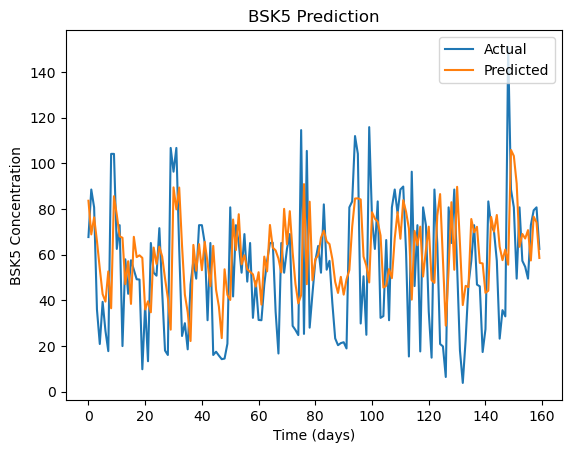

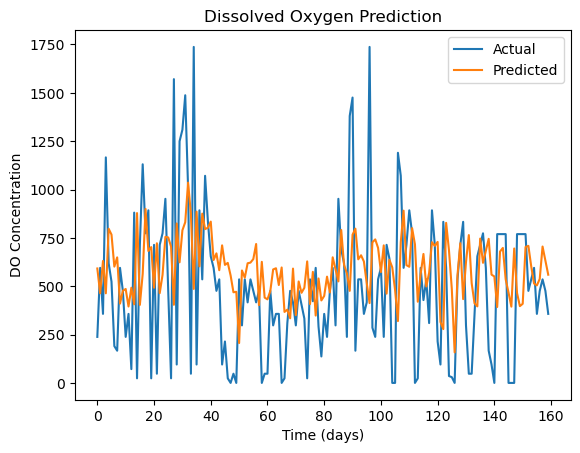

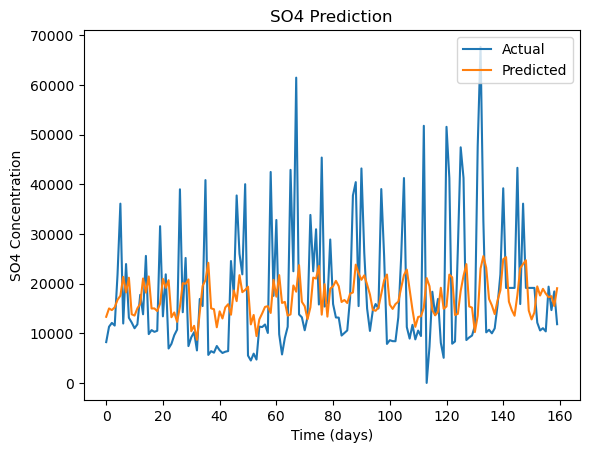

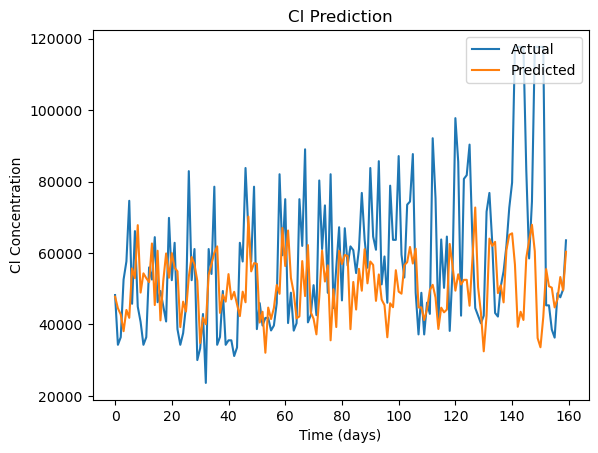

In [22]:
# Plot actual vs predicted values
plt.plot(y_test[:, 0])
plt.plot(test_predict[:, 0])
plt.title('BSK5 Prediction')
plt.ylabel('BSK5 Concentration')
plt.xlabel('Time (days)')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

plt.plot(y_test[:, 1])
plt.plot(test_predict[:, 1])
plt.title('Dissolved Oxygen Prediction')
plt.ylabel('DO Concentration')
plt.xlabel('Time (days)')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

plt.plot(y_test[:, 2])
plt.plot(test_predict[:, 2])
plt.title('SO4 Prediction')
plt.ylabel('SO4 Concentration')
plt.xlabel('Time (days)')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

plt.plot(y_test[:, 3])
plt.plot(test_predict[:, 3])
plt.title('Cl Prediction')
plt.ylabel('Cl Concentration')
plt.xlabel('Time (days)')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()


# TIME SERIES PREDICTION USING NH4 AND CL


Epoch 1/100
67/67 [==============================] - 2s 7ms/step - loss: 0.0067
Epoch 2/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 3/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 4/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 5/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 6/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 7/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 8/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 9/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 10/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 11/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 12/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 13/100
67/67 [=================

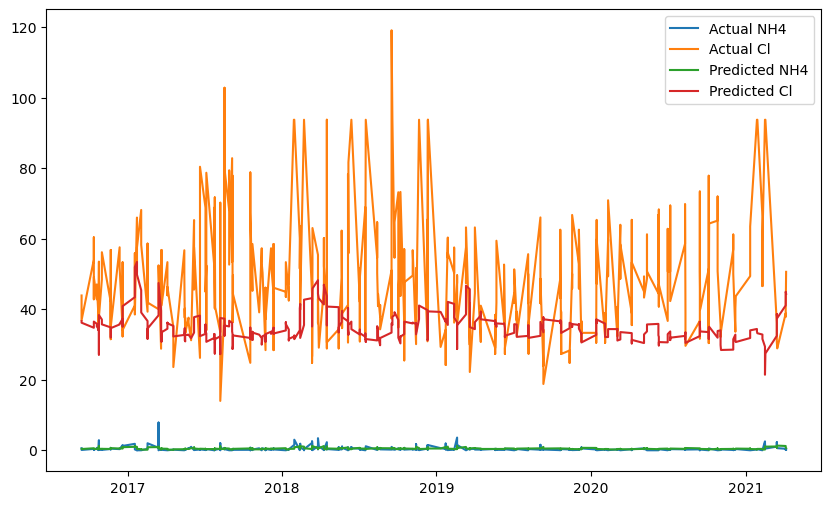

1/1 [==============================] - 0s 13ms/step


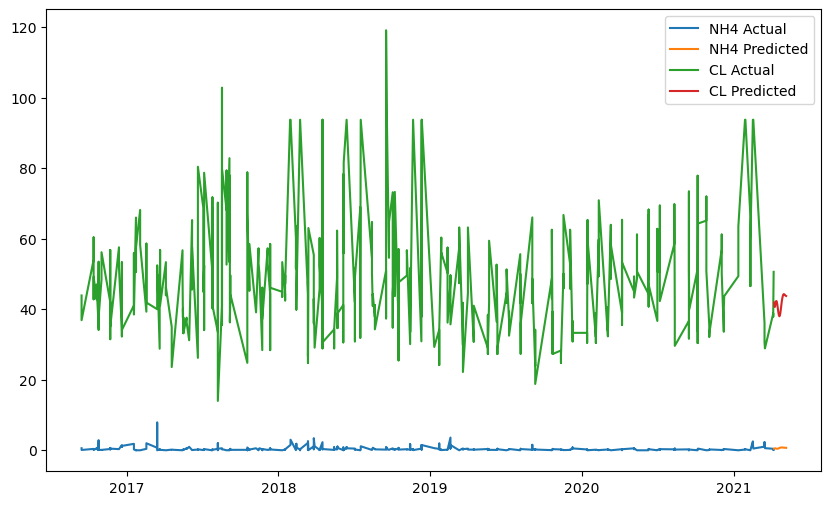

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv('cleaned_Iot_WaterQuality.csv', parse_dates=['date'], index_col='date')
target_cols = ['NH4', 'CL'] # choose target columns

# Prepare data for LSTM
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[target_cols].values)

# Split data into train and test sets
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train_data = data_scaled[0:train_size,:]
test_data = data_scaled[train_size:len(data_scaled),:]

# Define function to create LSTM dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        X.append(dataset[i:(i+look_back), :])
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

# Create LSTM dataset
look_back = 30 # choose number of previous time steps to use as input
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(look_back, len(target_cols))))
model.add(Dense(units=len(target_cols)))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Make predictions on test set
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size+look_back+1:],data[target_cols].values[train_size+look_back+1:,0], label='Actual NH4')
plt.plot(data.index[train_size+look_back+1:],data[target_cols].values[train_size+look_back+1:,1], label='Actual Cl')
plt.plot(data.index[train_size+look_back+1:],test_predictions[:,0], label='Predicted NH4')
plt.plot(data.index[train_size+look_back+1:],test_predictions[:,1], label='Predicted Cl')
plt.legend()
plt.show()

# Make prediction for future time steps
future_time_steps = 30
future_predictions = []
last_data = test_data[-look_back:, :]
for i in range(future_time_steps):
    input_data = np.reshape(last_data, (1, look_back, len(target_cols)))
    pred = model.predict(input_data)
    future_predictions.append(pred[0])
    last_data = np.vstack([last_data[1:], pred[0]])

# Inverse transform predicted values
future_predictions = scaler.inverse_transform(np.array(future_predictions))

# Plot future predictions
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date+pd.Timedelta(days=1), periods=future_time_steps, freq='D')
plt.figure(figsize=(10,6))

for i, col in enumerate(target_cols):
    plt.plot(data.index[train_size+look_back+1:],data[col].values[train_size+look_back+1:], label=col+' Actual')
    plt.plot(future_dates,future_predictions[:, i], label=col+' Predicted')
plt.legend()
plt.show()